In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | fairbanks
Processing Record 5 of Set 1 | itaberai
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | freeport
Processing Record 8 of Set 1 | dolores
Processing Record 9 of Set 1 | pathein
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | ampanihy
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | vestmannaeyjar
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | mutsamudu
City not found. Skipping...
Processing Record 21 of Set 1 | barent

Processing Record 35 of Set 4 | itaituba
Processing Record 36 of Set 4 | amberley
Processing Record 37 of Set 4 | dingle
Processing Record 38 of Set 4 | arsikere
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | saleaula
City not found. Skipping...
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | fayaoue
Processing Record 44 of Set 4 | port augusta
Processing Record 45 of Set 4 | camacha
Processing Record 46 of Set 4 | mahuta
Processing Record 47 of Set 4 | burns lake
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | tecoanapa
Processing Record 50 of Set 4 | moa
Processing Record 1 of Set 5 | klaksvik
Processing Record 2 of Set 5 | kenora
Processing Record 3 of Set 5 | arenillas
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | darhan
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | kavieng
Pr

Processing Record 23 of Set 8 | kaabong
Processing Record 24 of Set 8 | alindao
Processing Record 25 of Set 8 | batticaloa
Processing Record 26 of Set 8 | nome
Processing Record 27 of Set 8 | kloulklubed
Processing Record 28 of Set 8 | sarany
Processing Record 29 of Set 8 | vao
Processing Record 30 of Set 8 | hami
Processing Record 31 of Set 8 | oussouye
Processing Record 32 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 33 of Set 8 | mirnyy
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | grindavik
Processing Record 36 of Set 8 | temaraia
City not found. Skipping...
Processing Record 37 of Set 8 | chateau-thierry
Processing Record 38 of Set 8 | shar
Processing Record 39 of Set 8 | tianpeng
Processing Record 40 of Set 8 | baherden
Processing Record 41 of Set 8 | warrnambool
Processing Record 42 of Set 8 | beliator
Processing Record 43 of Set 8 | zyryanka
Processing Record 44 of Set 8 | rio gallegos
Processing Record 45 of Set 8 | salta
Proces

Processing Record 14 of Set 12 | byron bay
Processing Record 15 of Set 12 | san jeronimo
Processing Record 16 of Set 12 | takoradi
Processing Record 17 of Set 12 | kyzyl-suu
Processing Record 18 of Set 12 | verkh-usugli
Processing Record 19 of Set 12 | dargaville
Processing Record 20 of Set 12 | constitucion
Processing Record 21 of Set 12 | piacabucu
Processing Record 22 of Set 12 | bayji
Processing Record 23 of Set 12 | marcona
City not found. Skipping...
Processing Record 24 of Set 12 | thurso
Processing Record 25 of Set 12 | richards bay
Processing Record 26 of Set 12 | andros town
Processing Record 27 of Set 12 | muros
Processing Record 28 of Set 12 | tahe
Processing Record 29 of Set 12 | latehar
Processing Record 30 of Set 12 | sao joao da barra
Processing Record 31 of Set 12 | bria
Processing Record 32 of Set 12 | merauke
Processing Record 33 of Set 12 | atambua
Processing Record 34 of Set 12 | elk point
Processing Record 35 of Set 12 | ewa beach
Processing Record 36 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,69.01,96,97,7.00,ZA,2021-03-14 21:25:54
1,Kapaa,22.0752,-159.3190,73.40,78,90,27.63,US,2021-03-14 21:25:55
2,Puerto Ayora,-0.7393,-90.3518,82.40,74,40,9.22,EC,2021-03-14 21:25:55
3,Fairbanks,64.8378,-147.7164,15.01,44,1,2.37,US,2021-03-14 21:25:56
4,Itaberai,-16.0203,-49.8103,72.88,90,99,3.74,BR,2021-03-14 21:25:56
5,Mataura,-46.1927,168.8643,56.82,74,100,4.61,NZ,2021-03-14 21:25:57
6,Freeport,40.6576,-73.5832,46.99,34,1,19.57,US,2021-03-14 21:24:11
7,Dolores,-36.3132,-57.6792,74.91,48,91,10.36,AR,2021-03-14 21:25:57
8,Pathein,16.7833,94.7333,73.67,84,0,8.41,MM,2021-03-14 21:25:58
9,Busselton,-33.6500,115.3333,57.99,74,34,4.00,AU,2021-03-14 21:25:58


In [16]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021-03-14 21:25:54,-33.5906,26.8910,69.01,96,97,7.00
1,Kapaa,US,2021-03-14 21:25:55,22.0752,-159.3190,73.40,78,90,27.63
2,Puerto Ayora,EC,2021-03-14 21:25:55,-0.7393,-90.3518,82.40,74,40,9.22
3,Fairbanks,US,2021-03-14 21:25:56,64.8378,-147.7164,15.01,44,1,2.37
4,Itaberai,BR,2021-03-14 21:25:56,-16.0203,-49.8103,72.88,90,99,3.74
...,...,...,...,...,...,...,...,...,...
558,Tokur,RU,2021-03-14 21:32:16,53.1333,132.9000,20.19,88,100,5.61
559,Kiama,AU,2021-03-14 21:32:17,-34.6833,150.8667,57.00,82,0,1.99
560,Bucerias,MX,2021-03-14 21:32:18,20.7500,-105.3333,75.20,64,40,13.80
561,Isla Aguada,MX,2021-03-14 21:32:18,18.7833,-91.4667,91.40,40,1,16.11


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

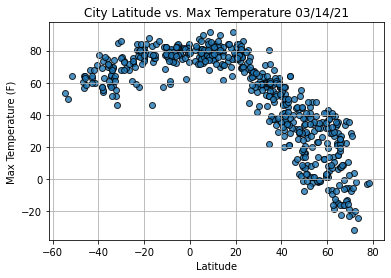

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

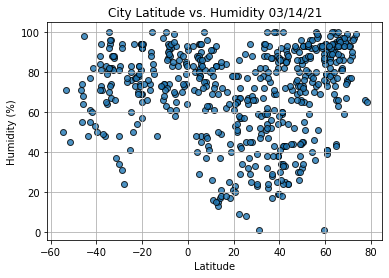

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

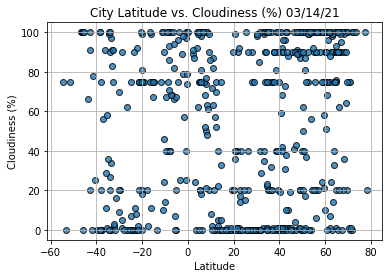

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

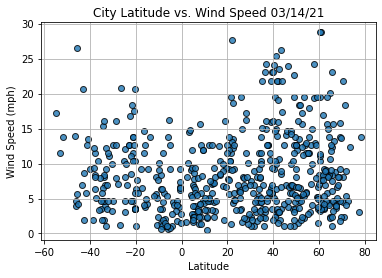

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()